In [1]:
import pandas as pd
import numpy as np
import joblib
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams
from keras.models import load_model
from datetime import datetime

# Models
# models for one day
rajhi_model_1 = load_model("Al-Rajhi/trained_model/best_lstm_model_1.keras")
amazon_model_1 = load_model("Amazon/trained_model/Amazon_model_1.keras")
apple_model_1 = load_model("Apple/trained_model/best_lstm_model_1.keras")
aramco_model_1 = load_model("Aramco/trained_model/best_lstm_model_1.keras")
leejam_model_1 = load_model("Leejam/trained_model/best_lstm_model_1.keras")
sabic_model_1 = load_model("Sabic/trained_model/best_lstm_model_1.keras")
tesla_model_1 = load_model("Tesla/trained_model/best_lstm_model_1.keras")


# models for 5 days
rajhi_model_5 = load_model("Al-Rajhi/trained_model/best_lstm_model_5.keras")
amazon_model_5 = load_model("Amazon/trained_model/best_lstm_model_5.keras")
apple_model_5 = load_model("Apple/trained_model/best_lstm_model_5.keras")
aramco_model_5 = load_model("Aramco/trained_model/best_lstm_model_5.keras")
leejam_model_5 = load_model("Leejam/trained_model/best_lstm_model_5.keras")
sabic_model_5 = load_model("Sabic/trained_model/best_lstm_model_5.keras")
tesla_model_5 = load_model("Tesla/trained_model/best_lstm_model_5.keras")



# models for 15 days
rajhi_model_15 = load_model("Al-Rajhi/trained_model/best_lstm_model_15.keras")
amazon_model_15 = load_model("Amazon/trained_model/best_lstm_model_15.keras")
apple_model_15 = load_model("Apple/trained_model/best_lstm_model_15.keras")
aramco_model_15 = load_model("Aramco/trained_model/best_lstm_model_15.keras")
leejam_model_15 = load_model("Leejam/trained_model/best_lstm_model_15.keras")
sabic_model_15 = load_model("Sabic/trained_model/best_lstm_model_15.keras")
tesla_model_15 = load_model("Tesla/trained_model/best_lstm_model_15.keras")


# Scaler
# scaler for one day
rajhi_scaler_1 = joblib.load('Al-Rajhi/scaler/rajhi_scaler_1.joblib')
amazon_scaler_1 = joblib.load('Amazon/scaler/amazon_scaler_1.joblib')
apple_scaler_1 = joblib.load('Apple/scaler/appl_scaler_1.joblib')
aramco_scaler_1 = joblib.load('Aramco/scaler/aramco_stock_1.joblib')
leejam_scaler_1 = joblib.load('Leejam/scaler/leejam_scaler_1.joblib')
sabic_scaler_1 = joblib.load('Sabic/scaler/sabic_scaler_1.joblib')
tesla_scaler_1 = joblib.load('Tesla/scaler/tesla_scaler_1.joblib')

# scaler for 5 days
rajhi_scaler_5 = joblib.load('Al-Rajhi/scaler/rajhi_scaler_5.joblib')
amazon_scaler_5 = joblib.load('Amazon/scaler/amazon_scaler_5.joblib')
apple_scaler_5 = joblib.load('Apple/scaler/appl_scaler_5.joblib')
aramco_scaler_5 = joblib.load('Aramco/scaler/aramco_stock_5.joblib')
leejam_scaler_5 = joblib.load('Leejam/scaler/leejam_scaler_5.joblib')
sabic_scaler_5 = joblib.load('Sabic/scaler/sabic_scaler_5.joblib')
tesla_scaler_5 = joblib.load('Tesla/scaler/tesla_scaler_5.joblib')

# scaler for 15 days 
rajhi_scaler_15 = joblib.load('Al-Rajhi/scaler/rajhi_scaler_15.joblib')
amazon_scaler_15 = joblib.load('Amazon/scaler/amazon_scaler_15.joblib')
apple_scaler_15 = joblib.load('Apple/scaler/appl_scaler_15.joblib')
aramco_scaler_15 = joblib.load('Aramco/scaler/aramco_stock_15.joblib')
leejam_scaler_15 = joblib.load('Leejam/scaler/leejam_scaler_15.joblib')
sabic_scaler_15 = joblib.load('Sabic/scaler/sabic_scaler_15.joblib')
tesla_scaler_15 = joblib.load('Tesla/scaler/tesla_scaler_15.joblib')

In [2]:
def get_stock_data(symbol):
    return yf.download(symbol, period="6mo", interval="1d")

In [17]:
def prediction_1(amazon_model_1, amazon_scaler_1, symbol="AMZN", seq_length = 60):
    
    stock_data = get_stock_data(symbol)
    stock_data['Date'] = stock_data.index
    stock_prices = stock_data['Close'].values.reshape(-1, 1)
    last_value = stock_prices[-1]
    stock_prices_scaled = amazon_scaler_1.transform(stock_prices)
    X_future = stock_prices_scaled[-seq_length:]
    X_future = np.expand_dims(X_future, axis=0)
    prediction = amazon_model_1.predict(X_future)
    prediction = amazon_scaler_1.inverse_transform(prediction)
    
    return f"last_value: {last_value[0]}, next_value: {prediction[0][0]}"

prediction_1(amazon_model_1, amazon_scaler_1, symbol="AMZN", seq_length = 60)

[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


'last_value: 228.60499572753906, next_value: 224.8216552734375'

In [19]:
def prediction_5(amazon_model_5, amazon_scaler_5, symbol="AMZN", seq_length = 100):
    
    stock_data = get_stock_data(symbol)
    stock_data['Date'] = stock_data.index
    stock_prices = stock_data['Close'].values.reshape(-1, 1)
    stock_prices_scaled = amazon_scaler_5.transform(stock_prices)
    X_future = stock_prices_scaled[-seq_length:]
    X_future = np.expand_dims(X_future, axis=0)
    predictions = amazon_model_5.predict(X_future)
    predictions = amazon_scaler_5.inverse_transform(predictions)
    
    predicted_prices = predictions[0]  # Prediction for next 5 days
    
    start_date = datetime.now().strftime('%Y-%m-%d')
    predicted_dates = pd.date_range(start=start_date, periods=5)  
    
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_dates, predicted_prices, label="Predicted Prices", color="orange", linewidth=2, linestyle="--", marker="o")
    plt.title("Stock Price Prediction (Next 5 Days)", fontsize=16, weight='bold')
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Stock Price", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.5)
    
    for i, price in enumerate(predicted_prices):
        plt.text(predicted_dates[i], price, f'{price:.2f}', fontsize=10, ha='center', color="darkorange")
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


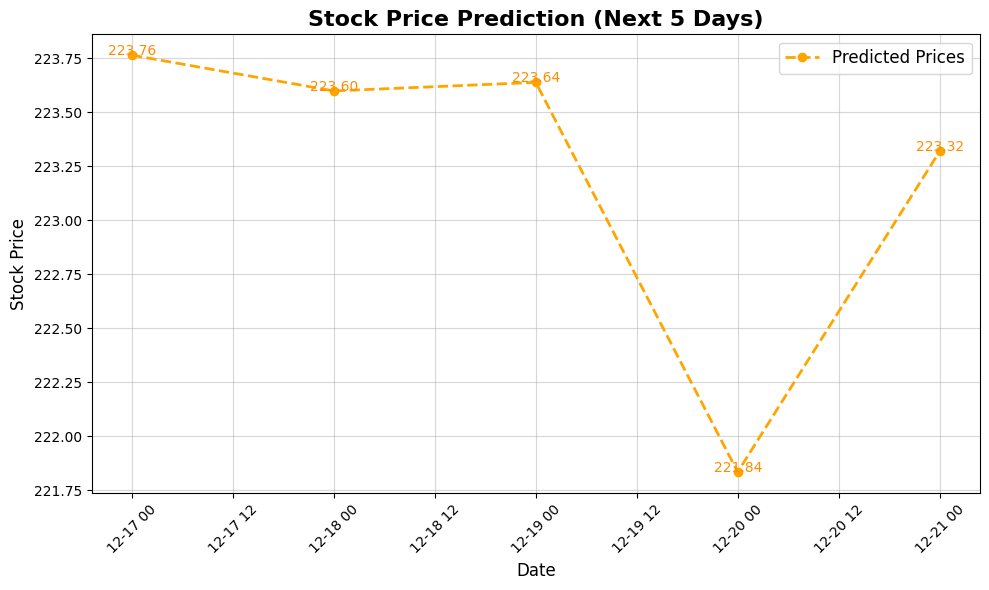

In [20]:
prediction_5(amazon_model_5, amazon_scaler_5, symbol="AMZN", seq_length = 100)

In [21]:
def prediction_15(amazon_model_15, amazon_scaler_15, symbol="AMZN", seq_length = 120):

    stock_data = get_stock_data(symbol)
    stock_data['Date'] = stock_data.index
    stock_prices = stock_data['Close'].values.reshape(-1, 1)
    stock_prices_scaled = amazon_scaler_15.transform(stock_prices)
    X_future = stock_prices_scaled[-seq_length:]
    X_future = np.expand_dims(X_future, axis=0)
    predictions = amazon_model_15.predict(X_future)
    predictions = amazon_scaler_15.inverse_transform(predictions)
    
    
    predicted_prices = predictions[0] 

    start_date = datetime.now().strftime('%Y-%m-%d')

    predicted_dates = pd.date_range(start=start_date, periods=15)  

    # Plotting
    plt.figure(figsize=(15, 10))

    # Predicted prices
    plt.plot(predicted_dates, predicted_prices, label="Predicted Prices", color="orange", linewidth=2, linestyle="--", marker="o")

    # Enhancements
    plt.title("Stock Price Prediction (Next 15 Days)", fontsize=16, weight='bold')
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Stock Price (USD)", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=1)

    # Annotate predictions
    for i, price in enumerate(predicted_prices):
        plt.text(predicted_dates[i], price, f'{price:.2f}', fontsize=10, ha='center', color="darkorange")

    # Formatting dates for better readability
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


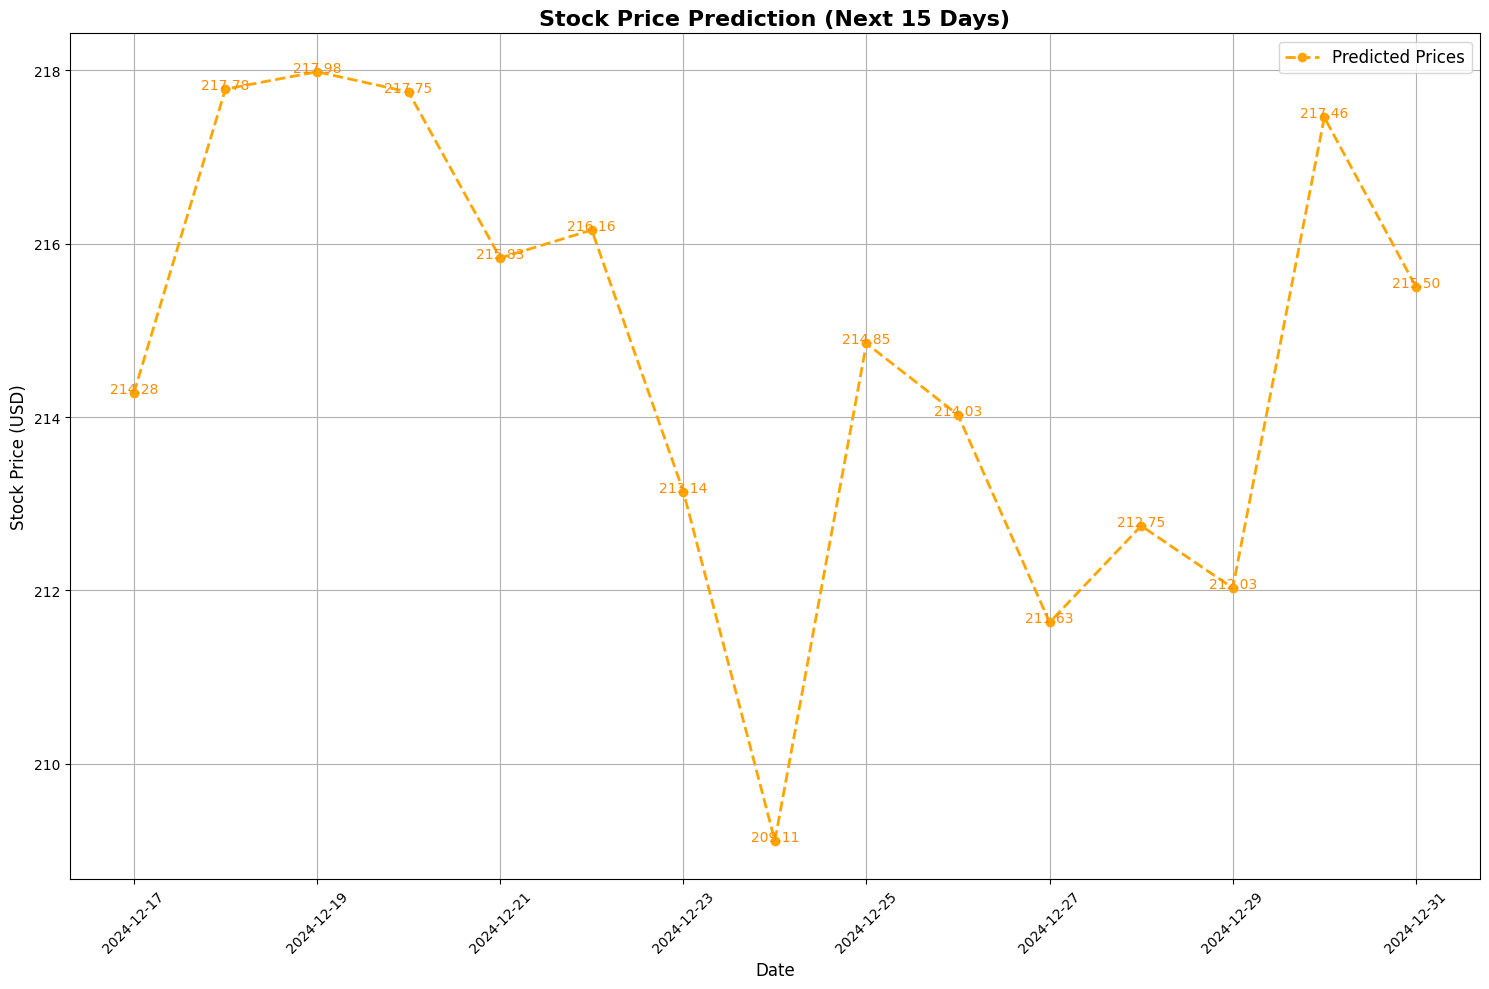

In [22]:

prediction_15(amazon_model_15, amazon_scaler_15, symbol="AMZN", seq_length = 120)